In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
data_file = pd.read_csv('result3.csv')

In [4]:
data_file.describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,year,quart,return,last_return
count,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,...,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000
mean,1.934676,1.909732,22.233223,2.926143,14.428193,21.988104,84.557912,51.578900,6.046190,28.381086,...,3.543460,4.363080,1.619221,1.491252,1.409777,0.915031,2013.203820,2.516454,1.035751,1.031672
std,1.786361,1.763966,16.763664,2.784431,12.565569,22.502162,66.569252,46.054232,5.533868,28.657611,...,4.993376,6.211652,1.014030,0.980491,1.035513,0.624531,4.069402,1.129035,0.162546,0.158276
min,-1.100000,-1.070000,-5.990000,-1.700000,-7.440000,-9.460000,-47.830000,-55.992500,-2.710000,-39.430000,...,-2.720000,-2.880000,-0.290000,0.000500,-0.280000,-0.060000,2006.000000,1.000000,0.127124,0.127124
25%,0.640000,0.630000,9.810000,0.860000,4.520000,5.500000,32.710000,9.972500,1.750000,1.260000,...,0.380000,0.440000,0.830000,0.790000,0.640000,0.480000,2010.000000,2.000000,0.952890,0.953180
50%,1.510000,1.480000,17.710000,2.140000,10.500000,12.980000,72.980000,42.955000,3.980000,21.605000,...,1.930000,2.100000,1.390000,1.190000,1.100000,0.750000,2013.000000,3.000000,1.039123,1.033885
75%,2.910000,2.870000,31.540000,4.400000,21.017500,31.747500,123.770000,78.367500,8.440000,50.600000,...,6.010000,7.097500,2.180000,2.030000,1.900000,1.240000,2017.000000,4.000000,1.120891,1.116083
max,5.710000,5.650000,59.200000,8.920000,42.052500,69.282500,225.350000,149.192500,17.360000,108.590000,...,14.170000,17.092500,3.760000,3.710000,3.500000,2.220000,2020.000000,4.000000,3.239215,2.890282


In [5]:
data_test = data_file[data_file['year']>=2017]
data_train = data_file[data_file['year']<2017]

In [6]:
all_input = data_file.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)

all_output = data_file['return']
inputall = np.array(all_input)
outputall = np.array(all_output)

In [7]:
train_input = data_train.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)
#train_input = data_train[{'1','2','3','4','5','6','7','8','9','10'}]
train_output = data_train['return']
inputtrain = np.array(train_input)
outputtrain = np.array(train_output)

In [8]:
test_input = data_test.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)
test_output = data_test['return']
inputtest = np.array(test_input)
outputtest = np.array(test_output)

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

In [10]:
lambda_reg = 0.001

In [12]:
model = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(10,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.0001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2816      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 35,841
Trainable params: 35,841
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2 = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model2.compile(optimizer=tf.keras.optimizers.SGD(0.00001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [39]:
inputtrain = inputtrain.astype('float64')
history2 = model2.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model2.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 1s 50us/sample - loss: 39.6709 - mae: 3.8622 - mse: 39.4593
Epoch 2/500
19725/19725 [==============================] - 1s 33us/sample - loss: 6.0761 - mae: 1.7480 - mse: 5.8654
Epoch 3/500
19725/19725 [==============================] - 1s 33us/sample - loss: 3.7270 - mae: 1.3392 - mse: 3.5167
Epoch 4/500
19725/19725 [==============================] - 1s 33us/sample - loss: 2.6312 - mae: 1.1094 - mse: 2.4210
Epoch 5/500
19725/19725 [==============================] - 1s 38us/sample - loss: 2.1187 - mae: 0.9873 - mse: 1.9087
Epoch 6/500
19725/19725 [==============================] - 1s 32us/sample - loss: 1.7640 - mae: 0.8865 - mse: 1.5541
Epoch 7/500
19725/19725 [==============================] - 1s 32us/sample - loss: 1.5222 - mae: 0.8177 - mse: 1.3124
Epoch 8/500
19725/19725 [==============================] - 1s 32us/sample - loss: 1.3567 - mae: 0.7690 - mse: 1.1470
Epoch 9/500
19725/19725 [==============

[0.27604412346456136, 0.20323813, 0.06851305]

In [51]:
model3 = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model3.compile(optimizer=tf.keras.optimizers.SGD(0.0001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model3.summary()
inputtrain = inputtrain.astype('float64')
history3 = model3.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model3.evaluate(inputtest, outputtest)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 1s 66us/sample - loss: 17.5454 -

[0.17340229573170646, 0.14311828, 0.041210223]

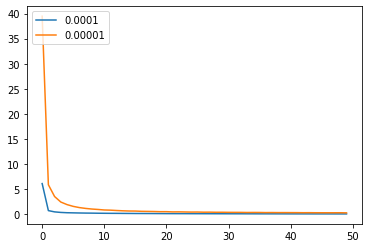

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'][0:50])
plt.plot(history2.history['mse'][0:50])
plt.legend(['0.0001','0.00001'], loc='upper left')
plt.savefig("relu_lr1.png")
plt.show()

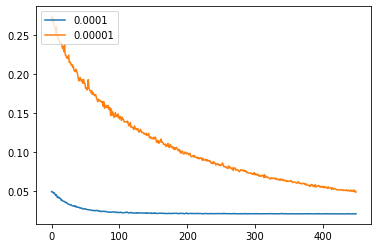

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'][50:500])
plt.plot(history2.history['mse'][50:500])
plt.legend(['0.0001','0.00001'], loc='upper left')
plt.savefig("relu_lr1.png")
plt.show()

In [34]:
lambda_reg = 0.001

In [40]:
model3 = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model3.compile(optimizer=tf.keras.optimizers.SGD(0.0001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [41]:
inputtrain = inputtrain.astype('float64')
history3 = model3.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model3.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 1s 73us/sample - loss: 277.6593 - mae: 11.3560 - mse: 277.4468
Epoch 2/500
19725/19725 [==============================] - 1s 42us/sample - loss: 199.0315 - mae: 9.5911 - mse: 198.8192
Epoch 3/500
19725/19725 [==============================] - 1s 42us/sample - loss: 150.9491 - mae: 8.2916 - mse: 150.7372
Epoch 4/500
19725/19725 [==============================] - 1s 42us/sample - loss: 117.5462 - mae: 7.3446 - mse: 117.3345
Epoch 5/500
19725/19725 [==============================] - 1s 42us/sample - loss: 90.2058 - mae: 6.4482 - mse: 89.9945
Epoch 6/500
19725/19725 [==============================] - 1s 43us/sample - loss: 71.2926 - mae: 5.7626 - mse: 71.0815
Epoch 7/500
19725/19725 [==============================] - 1s 45us/sample - loss: 54.6429 - mae: 5.0386 - mse: 54.4320
Epoch 8/500
19725/19725 [==============================] - 1s 44us/sample - loss: 46.1776 - mae: 4.6112 - mse: 45.9669
Epoch 9/500
1972

[0.043280400750688564, 0.14520654, 0.04212476]

In [42]:
lambda_reg = 0.01

In [45]:
model4 = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model4.compile(optimizer=tf.keras.optimizers.SGD(0.00001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [50]:
inputtrain = inputtrain.astype('float64')
history4 = model4.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model4.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 1s 68us/sample - loss: 0.0310 - mae: 0.1078 - mse: 0.0217
Epoch 2/2000
19725/19725 [==============================] - 1s 66us/sample - loss: 0.0309 - mae: 0.1076 - mse: 0.0216
Epoch 3/2000
19725/19725 [==============================] - 1s 66us/sample - loss: 0.0309 - mae: 0.1076 - mse: 0.0216
Epoch 4/2000
19725/19725 [==============================] - 1s 65us/sample - loss: 0.0310 - mae: 0.1076 - mse: 0.0217
Epoch 5/2000
19725/19725 [==============================] - 1s 65us/sample - loss: 0.0310 - mae: 0.1076 - mse: 0.0217
Epoch 6/2000
19725/19725 [==============================] - 1s 62us/sample - loss: 0.0309 - mae: 0.1075 - mse: 0.0216
Epoch 7/2000
19725/19725 [==============================] - 1s 65us/sample - loss: 0.0310 - mae: 0.1078 - mse: 0.0217
Epoch 8/2000
19725/19725 [==============================] - 1s 69us/sample - loss: 0.0309 - mae: 0.1076 - mse: 0.0216
Epoch 9/2000
19725/19725 [=======

[0.05180113098464193, 0.14563146, 0.042407315]

In [47]:
lambda_reg = 0.1

In [48]:
model5 = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model5.compile(optimizer=tf.keras.optimizers.SGD(0.0001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [49]:
inputtrain = inputtrain.astype('float64')
history5 = model5.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model5.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 2s 93us/sample - loss: 303.0675 - mae: 11.5627 - mse: 281.8225
Epoch 2/500
19725/19725 [==============================] - 1s 62us/sample - loss: 227.5996 - mae: 9.9086 - mse: 206.5949
Epoch 3/500
19725/19725 [==============================] - 1s 59us/sample - loss: 174.2946 - mae: 8.5164 - mse: 153.5125
Epoch 4/500
19725/19725 [==============================] - 1s 63us/sample - loss: 137.0898 - mae: 7.4324 - mse: 116.5272
Epoch 5/500
19725/19725 [==============================] - 1s 66us/sample - loss: 109.8323 - mae: 6.5252 - mse: 89.4908
Epoch 6/500
19725/19725 [==============================] - 1s 61us/sample - loss: 88.8237 - mae: 5.7266 - mse: 68.7062
Epoch 7/500
19725/19725 [==============================] - 1s 61us/sample - loss: 75.0037 - mae: 5.0878 - mse: 55.1151
Epoch 8/500
19725/19725 [==============================] - 1s 59us/sample - loss: 62.1364 - mae: 4.5097 - mse: 42.4831
Epoch 9/500
197

[0.10964604915472428, 0.18075915, 0.058696307]

In [64]:
lambda_reg = 0.01
model6 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model6.compile(optimizer=tf.keras.optimizers.SGD(0.0001),
             loss='mean_squared_error', 
             metrics=['mae','mse'])
model6.summary()
inputtrain = inputtrain.astype('float64')
history6 = model6.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model6.evaluate(inputtest, outputtest)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                1472      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 1s 52us/sample - loss: 1064.8247 -

[0.05179563964105995, 0.14471105, 0.04198189]

In [24]:
lambda_reg = 0.01
model7 = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model7.compile(optimizer=tf.keras.optimizers.SGD(0.0001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model7.summary()
inputtrain = inputtrain.astype('float64')
history7 = model7.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model7.evaluate(inputtest, outputtest)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               2944      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 1s 53us/sample - loss: 326.6053 -

[0.05191842571208356, 0.14551347, 0.042340666]

In [11]:
lambda_reg = 0.01
modelfinal = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

modelfinal.compile(optimizer=tf.keras.optimizers.SGD(0.0001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
modelfinal.summary()
inputtrain = inputtrain.astype('float64')
historyfinal = modelfinal.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
modelfinal.evaluate(inputtest, outputtest)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 1s 55us/sample - loss: 65.1512 - mae:

[0.6299040813948471, 0.1438386, 0.04145907]

In [52]:
data_pre = pd.read_csv('pred_new.csv')
data_pre = data_pre.drop(['Unnamed: 0'],axis=1)
data_pre.fillna(0,inplace=True)
pred_data = np.array(data_pre)

In [54]:
y = modelfinal.predict(pred_data)
df = pd.DataFrame(y)
df.loc[391,0]=1.2345
df.loc[427,0]=df.loc[427,0]/10
df.to_csv('relu_result2.csv')

In [49]:
data_pre.describe()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,last_return
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,...,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,-66.695467,-66.721844,34.526987,2.328973,23.001629,31.039289,101.367044,66.161514,7.543635,29.752825,...,-0.985567,1.413862,-12.633077,2.629973,-7.426180,1.915204,1.540967,2.337063,0.846981,0.751053
std,1440.268558,1440.267027,49.663308,9.024292,37.380517,83.641041,98.164960,84.409178,16.149129,36.553149,...,23.524975,10.879339,107.145684,10.771163,109.931193,5.918590,2.096619,2.655914,0.732877,0.187668
min,-30653.000000,-30653.000000,-86.890000,-154.220000,-14.310000,-23.130000,-15.820000,-23.370000,-4.230000,-285.540000,...,-367.880000,-83.860000,-2161.980000,-84.210000,-2133.900000,-0.080000,0.040000,-0.710000,-0.110000,0.164605
25%,0.310000,0.310000,11.550000,0.560000,6.140000,4.420000,37.900000,6.550000,1.030000,0.990000,...,-0.985567,0.100000,-12.633077,-0.130000,-7.426180,0.890000,0.880000,1.160000,0.540000,0.632872
50%,1.010000,1.010000,23.630000,1.470000,14.230000,9.430000,79.600000,49.310000,2.100000,24.260000,...,0.470000,0.230000,-2.540000,2.000000,-0.340000,1.510000,1.540967,2.337063,0.846981,0.771873
75%,2.320000,2.280000,42.470000,3.430000,24.650000,23.640000,140.250000,89.090000,6.320000,52.490000,...,1.880000,1.413862,1.750000,3.210000,2.040000,1.915204,1.540967,2.337063,0.846981,0.870449
max,47.970000,44.960000,657.900000,37.490000,579.070000,1426.240000,740.570000,599.810000,147.500000,229.890000,...,94.060000,83.380000,125.470000,69.250000,772.500000,123.940000,40.080000,26.380000,7.260000,1.300442


In [23]:
data_pre = pd.read_csv('pred201912_withreturn.csv')
data_pre = data_pre.drop(['stock'],axis=1)
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('relu_result2.csv')

In [25]:
data_pre = pd.read_csv('pred201909_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('relu_result3.csv')

In [28]:
data_pre = pd.read_csv('pred201906_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('relu_result4.csv')

In [29]:
data_pre = pd.read_csv('pred201903_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('relu_result5.csv')